In [1]:
// %mavenRepo snapshots https://oss.sonatype.org/content/repositories/snapshots/

%maven ai.djl:api:0.22.1
%maven ai.djl.mxnet:mxnet-engine:0.22.1
%maven ai.djl.mxnet:mxnet-model-zoo:0.22.1
%maven ai.djl:basicdataset:0.22.1
%maven org.slf4j:slf4j-simple:1.7.32
%maven org.knowm.xchart:xchart:3.8.3

In [2]:
import ai.djl.ndarray.*;
import ai.djl.ndarray.types.*;

import ai.djl.Application;
import ai.djl.Model;
import ai.djl.ModelException;
import ai.djl.modality.nlp.DefaultVocabulary;
import ai.djl.ndarray.NDArray;
import ai.djl.ndarray.NDList;
import ai.djl.ndarray.NDManager;
import ai.djl.ndarray.types.Shape;
import ai.djl.repository.zoo.Criteria;
import ai.djl.repository.zoo.ModelZoo;
import ai.djl.repository.zoo.ZooModel;
import ai.djl.modality.nlp.embedding.ModelZooTextEmbedding;
import ai.djl.training.util.ProgressBar;
import ai.djl.modality.Classifications;

import java.io.IOException;
import java.util.Arrays;
import java.util.List;

import org.knowm.xchart.*;

import java.io.*;
import java.util.*;
import java.util.stream.*;

In [3]:
NDArray kingEmbedding;
NDArray queenEmbedding;
NDArray manEmbedding;
NDArray womanEmbedding;

Criteria<String, NDList> criteria =
        Criteria.builder()
                .optApplication(Application.NLP.WORD_EMBEDDING)
                .setTypes(String.class, NDList.class)
                .optArtifactId("ai.djl.mxnet:glove")
                .optFilter("dimensions", "50")
                .optProgress(new ProgressBar())
                .build();

ZooModel<String, NDList> model = criteria.loadModel();
ModelZooTextEmbedding embedding = new ModelZooTextEmbedding(model);

NDManager manager = model.getNDManager();

List<String> words = Arrays.asList("king", "queen", "man", "woman");

NDList result = new NDList(embedding.embedText(manager, words));

kingEmbedding = result.get(0).get(0);
queenEmbedding = result.get(0).get(1);
manEmbedding = result.get(0).get(2);
womanEmbedding = result.get(0).get(3);

System.out.println("King embedding shape: " + kingEmbedding.getShape());
System.out.println("King: " + Arrays.toString(kingEmbedding.toFloatArray()));

System.out.println("Queen embedding shape: " + queenEmbedding.getShape());
System.out.println("Queen: " + Arrays.toString(queenEmbedding.toFloatArray()));

Loading:     100% |████████████████████████████████████████|
King embedding shape: (50)
King: [0.15778, 0.2638, -0.44502, -0.46819, 0.88558, -0.11134, -0.22886, 0.25545, -0.53813, 0.33681, 0.022259, 0.6781, -0.48255, 0.0024954, 0.55938, 0.4102, 0.61032, 0.18802, 0.22943, -0.9891, -0.72062, 0.52451, 0.33157, 0.48512, 0.9676, -1.9021, -0.93215, 0.47344, 0.85667, -0.52803, 3.1994, 0.51182, -0.083763, -0.48335, -0.12347, -0.27206, -0.14103, 0.5947, -0.61738, -0.29798, -0.16374, 0.0086967, -0.12262, 0.66676, 0.097146, -0.044463, -0.27159, -0.14953, -0.22232, 0.52731]
Queen embedding shape: (50)
Queen: [-0.20689, 0.12289, 1.044, -0.13762, 0.077669, 0.97803, -1.0645, -0.14454, -0.29442, -0.59934, -1.9395, -0.65427, -0.010354, -0.093356, -0.57136, -0.46314, -0.38832, -0.64843, 0.041901, -0.29102, -0.53942, -0.017816, 0.77069, -0.76508, 0.76896, -2.4194, -0.075117, 0.42688, 0.11738, -0.22828, 1.4013, 0.60679, -0.76996, -0.70209, -0.63007, -1.2013, -0.68098, 0.69822, -1.0322, -0.99351, -0.24728,

In [4]:
import java.awt.Color;
import java.awt.Font;
import java.awt.FontMetrics;
import java.awt.Graphics2D;
import java.awt.image.BufferedImage;
import java.io.File;
import javax.imageio.ImageIO;

public static BufferedImage visualizeEmbedding(String embeddingName, NDArray embedding, int cellWidth, int cellHeight, boolean printValues) {
    int size = (int) embedding.size();
    int imageWidth = cellWidth * size;

    // Adding some space for the name and values
    int padding = 50;
    int imageHeight = cellHeight + padding;

    BufferedImage image = new BufferedImage(imageWidth, imageHeight, BufferedImage.TYPE_INT_RGB);
    Graphics2D g = image.createGraphics();

    // Set the font and draw the embedding name
    g.setFont(new Font("Arial", Font.BOLD, 16));
    FontMetrics metrics = g.getFontMetrics();
    g.drawString(embeddingName, 5, metrics.getHeight());

    for (int i = 0; i < size; i++) {
        float value = embedding.getFloat(i);
        float normalizedValue = (value + 2) / 4; // Normalize the value between 0 and 1
        normalizedValue = Math.max(0, Math.min(1, normalizedValue)); // Ensure value is between 0 and 1

        // Linearly interpolate between blue and white for values below 0.5 and between white and red for values above 0.5
        float red = normalizedValue > 0.5 ? 1 : 2 * normalizedValue;
        float green = normalizedValue > 0.5 ? 2 * (1 - normalizedValue) : 2 * normalizedValue;
        float blue = normalizedValue > 0.5 ? 2 * (1 - normalizedValue) : 1;

        Color color = new Color(red, green, blue);

        for (int h = padding; h < imageHeight; h++) {
            for (int w = i * cellWidth; w < (i + 1) * cellWidth; w++) {
                image.setRGB(w, h, color.getRGB());
            }
        }

        // If printValues is true, print the value of each cell
        if (printValues) {
            g.setColor(Color.BLACK);
            g.drawString(String.format("%.2f", value), i * cellWidth, imageHeight - 5);
        }
    }

    g.dispose();

    return image;
}

In [5]:
int cellWidth = 20;

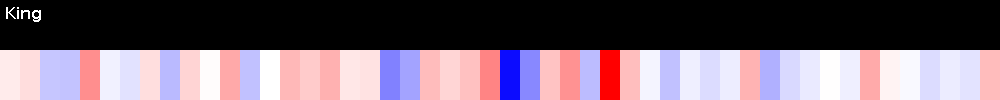

In [6]:
visualizeEmbedding("King", kingEmbedding, cellWidth, 50, false);

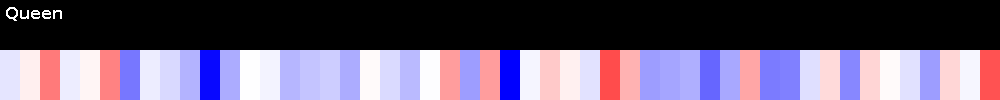

In [7]:
visualizeEmbedding("Queen", queenEmbedding, cellWidth, 50, false);

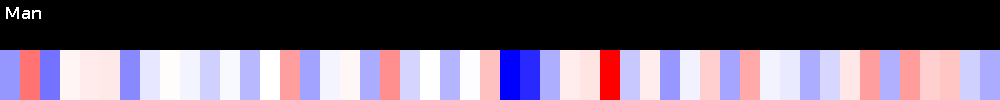

In [8]:
visualizeEmbedding("Man", manEmbedding, cellWidth, 50, false);

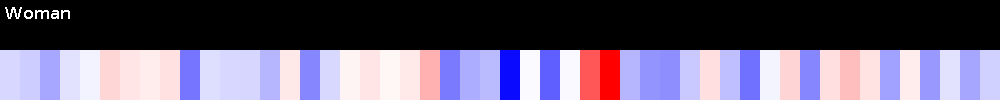

In [9]:
visualizeEmbedding("Woman", womanEmbedding, cellWidth, 50, false);

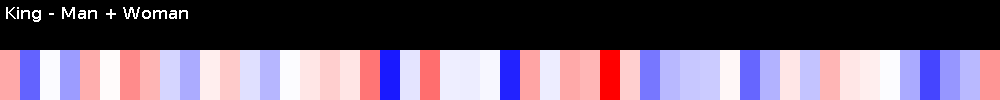

In [10]:
NDArray queenIsh = kingEmbedding.sub(manEmbedding).add(womanEmbedding);
visualizeEmbedding("King - Man + Woman", queenIsh, cellWidth, 50, false);

In [11]:
System.out.println("queenIsh embedding shape: " + queenIsh.getShape());
System.out.println("queenIsh: " + Arrays.toString(queenIsh.toFloatArray()));

queenIsh embedding shape: (50)
queenIsh: [0.67332006, -1.22644, -0.033339977, -0.776456, 0.63450104, 0.031590015, 0.90885997, 0.58699, -0.328561, -0.65879005, 0.13019899, 0.41653502, -0.24564996, -0.5697498, -0.023230001, 0.19263, 0.38347697, 0.206045, 1.08172, -1.80633, -0.21172997, 1.1398296, -0.13005996, -0.13892204, -0.06323999, -1.7328999, 0.71458596, -0.14240003, 0.670912, 0.57420003, 3.249, 0.37259, -1.069703, -0.55513, -0.44287, -0.40933004, 0.065400004, -1.1972201, -0.607821, 0.19806999, -0.47261, 0.5765767, 0.19757998, 0.13513005, -0.021974027, -0.669463, -1.4616699, -0.82707, -0.54992, 0.82176006]


In [12]:
public static NDArray pairwiseDistance(NDArray A, NDArray B) {
    return A.sub(B).square().sum(new int[]{0}).sqrt();
}

In [13]:
public static float cosineSimilarity(NDArray a, NDArray b) {
    NDArray dotProduct = a.dot(b);
    float normA = a.norm().getFloat();
    float normB = b.norm().getFloat();
    return dotProduct.getFloat() / (normA * normB);
}

In [14]:
public static float euclideanDistance(NDArray a, NDArray b) {
    NDArray dist = a.sub(b).norm(); 
    return dist.getFloat();
}

In [15]:
import java.util.AbstractMap.SimpleEntry;
import ai.djl.ndarray.NDArray;

public static String cosineSimilarityTable(AbstractMap.SimpleEntry<String, NDArray>... entries) {
    StringBuilder table = new StringBuilder();

    // Table header
    table.append("|             | ");
    for (AbstractMap.SimpleEntry<String, NDArray> entry : entries) {
        table.append(entry.getKey()).append(" | ");
    }
    table.append("\n");

    // Table delimiter
    table.append("|-------------| ");
    for (int i = 0; i < entries.length; i++) {
        table.append("------------| ");
    }
    table.append("\n");

    // Table body
    for (AbstractMap.SimpleEntry<String, NDArray> entryRow : entries) {
        table.append("| ").append(entryRow.getKey()).append(" | ");
        for (AbstractMap.SimpleEntry<String, NDArray> entryColumn : entries) {
            table.append(cosineSimilarity(entryRow.getValue(), entryColumn.getValue())).append(" | ");
        }
        table.append("\n");
    }

    return table.toString();
}

In [16]:
import java.util.AbstractMap.SimpleEntry;
import ai.djl.ndarray.NDArray;

public static String euclideanDistanceTable(AbstractMap.SimpleEntry<String, NDArray>... entries) {
    StringBuilder table = new StringBuilder();

    // Table header
    table.append("|             | ");
    for (AbstractMap.SimpleEntry<String, NDArray> entry : entries) {
        table.append(entry.getKey()).append(" | ");
    }
    table.append("\n");

    // Table delimiter
    table.append("|-------------| ");
    for (int i = 0; i < entries.length; i++) {
        table.append("------------| ");
    }
    table.append("\n");

    // Table body
    for (AbstractMap.SimpleEntry<String, NDArray> entryRow : entries) {
        table.append("| ").append(entryRow.getKey()).append(" | ");
        for (AbstractMap.SimpleEntry<String, NDArray> entryColumn : entries) {
            table.append(euclideanDistance(entryRow.getValue(), entryColumn.getValue())).append(" | ");
        }
        table.append("\n");
    }

    return table.toString();
}

In [17]:
String cosineSimilarities = cosineSimilarityTable(
    new SimpleEntry<>("King", kingEmbedding), 
    new SimpleEntry<>("Queen", queenEmbedding), 
    new SimpleEntry<>("Man", manEmbedding), 
    new SimpleEntry<>("Woman", womanEmbedding),
    new SimpleEntry<>("King - Man + Woman", queenIsh)
);

In [18]:
import io.github.spencerpark.ijava.runtime.Display;

Display.display(cosineSimilarities, "text/markdown");

|             | King | Queen | Man | Woman | King - Man + Woman | 
|-------------| ------------| ------------| ------------| ------------| ------------| 
| King | 0.99999994 | 0.48587015 | 0.59400713 | 0.36629754 | 0.6379426 | 
| Queen | 0.48587015 | 1.0000001 | 0.3360686 | 0.28942698 | 0.36757925 | 
| Man | 0.59400713 | 0.3360686 | 1.0000001 | 0.6100262 | 0.14799908 | 
| Woman | 0.36629754 | 0.28942698 | 0.6100262 | 0.9999997 | 0.6598337 | 
| King - Man + Woman | 0.6379426 | 0.36757925 | 0.14799908 | 0.6598337 | 1.0000002 | 


0b064724-bce5-4f09-906a-785632b5a9f4

In [19]:
String euclideanDistances = euclideanDistanceTable(
    new SimpleEntry<>("King", kingEmbedding), 
    new SimpleEntry<>("Queen", queenEmbedding), 
    new SimpleEntry<>("Man", manEmbedding), 
    new SimpleEntry<>("Woman", womanEmbedding),
    new SimpleEntry<>("King - Man + Woman", queenIsh)
);

In [20]:
Display.display(euclideanDistances, "text/markdown");

|             | King | Queen | Man | Woman | King - Man + Woman | 
|-------------| ------------| ------------| ------------| ------------| ------------| 
| King | 0.0 | 5.283627 | 4.65878 | 5.80773 | 4.7052336 | 
| Queen | 5.283627 | 0.0 | 6.1915126 | 6.398635 | 6.3748035 | 
| Man | 4.65878 | 6.1915126 | 0.0 | 4.705233 | 7.345555 | 
| Woman | 5.80773 | 6.398635 | 4.705233 | 0.0 | 4.65878 | 
| King - Man + Woman | 4.7052336 | 6.3748035 | 7.345555 | 4.65878 | 0.0 | 


17da6751-130e-45f6-9717-ee47bf9c42c5

In [21]:
// Close DLJ resources
model.close();
embedding.close();